패키지 참조 -> 데이터 셋 준비 -> 데이터 전처리 -> 탐색적 데이터 분석 -> 데이터 셋 분할 -> 모델 개발 -> 학습 결과 평가 -> 학습 결과 적용

![res/code.png](res/code.png)

분석 프로세스를 진행한 이유와 해당 프로세서를 통해 얻은 결론을 설명
- 모든 단계는 목적과 근거를 제시

# 단순 선형 회귀

## #01. 패키지

In [32]:
import sys
sys.path.append("../../")
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense

## #02. 데이터 준비

In [33]:
origin = read_excel("https://data.hossam.kr/E04/cars.xlsx")
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## #03. 데이터 전처리

### 결측치 확인

In [34]:
origin.isna().sum()

speed    0
dist     0
dtype: int64

> 결측치 없음

## #04. 탐색적 데이터 분석

### 기초통계 확인

describe

In [35]:
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


### 산점도 그래프와 추세선 확인

산점도, 추세선 확인 이유
- 단순선형, 다항식으로 갈지 여부를 결정 -> 곡선인 경우 다항식으로 분석
- 즉, 시각화 자료를 통한 차수 결정

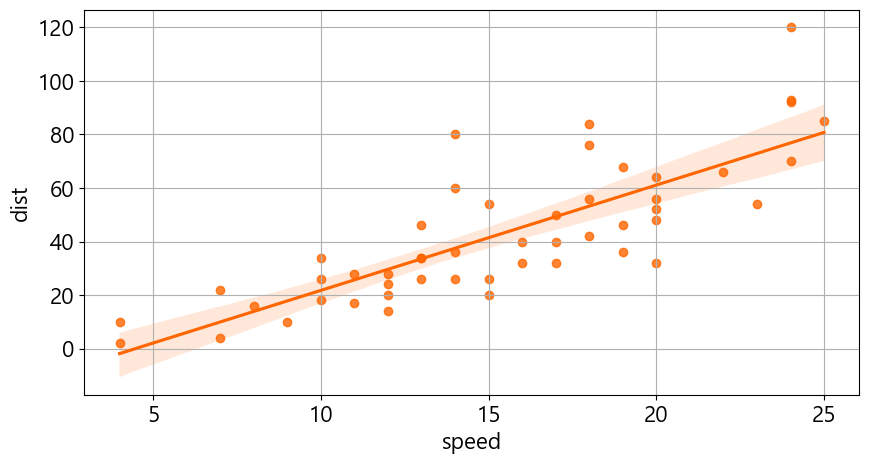

In [36]:
plt.figure(figsize=(10, 5))
sb.regplot(data=origin, x='speed', y='dist', color='#ff6600')
plt.grid()
plt.show()
plt.close()

> 곡선보다는 `선형 분포(직선)`에 더 가까우므로 `단순선형회귀모델`을 적용하기로 함

## #05. 데이터셋 분할

### 1. 랜덤시드 고정

In [37]:
np.random.seed(777)

### 2. 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

데이터프레임은 2차원 형식

In [38]:
# (행 수, 열 수)
x = origin.drop(['dist'], axis=1)
y = origin['dist']
print("훈련데이터 크기 :", x.shape, "/ 레이블 크기 :", y.shape)

훈련데이터 크기 : (50, 1) / 레이블 크기 : (50,)


### 3. 훈련 데이터와 검증 데이터로 분할

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 777)
print("훈련용 데이터셋 크기 : %d, 검증용 데이터셋 크기 : %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기 : 35, 검증용 데이터셋 크기 : 15


In [40]:
# 본인 추가 - 객체 확인
print("y_test :",type(y_test), "/", "x_test :", type(x_test))

y_test : <class 'pandas.core.series.Series'> / x_test : <class 'pandas.core.frame.DataFrame'>


## #06. 모델 개발

### 1. 모델 정의

- input_shape은 독립변수 수
- Dense 신경망 개수의 수에 따라서 모델의 성능에 차이가 발생
    - 직감으로 맞춤(다른 방법 없음) 보통 16 또는 32 이상
    - 최적의 값을 직접 탐색(단, 너무 크면 컴퓨터 다운)
- activation은 모델과 분석 종류에 따라서 다름 
    - 보통은 relu, 분류는 sigmoid, 회귀는 linear
- optimizer은 모르면 Adam 사용
- epochs는 많아도 크게 상관이 없음(단, 너무 크면 오래 걸림)
- 2차항을 하고 싶다면 sklearn으로 2차항 생성 후 Sequential에 입력

In [41]:
model = Sequential()
# 1차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(32, activation = 'relu', input_shape = (1, )))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                64        
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

- epochs는 많아도 크게 상관이 없음(단, 너무 크면 오래 걸림)

In [42]:
result = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300


2/2 [==============================] - 1s 160ms/step - loss: 2407.3889 - mae: 41.6655 - val_loss: 1661.2703 - val_mae: 35.1313
Epoch 2/300
2/2 [==============================] - 0s 34ms/step - loss: 2378.7202 - mae: 41.3686 - val_loss: 1640.4227 - val_mae: 34.8675
Epoch 3/300
2/2 [==============================] - 0s 36ms/step - loss: 2351.3621 - mae: 41.0790 - val_loss: 1620.1323 - val_mae: 34.6087
Epoch 4/300
2/2 [==============================] - 0s 36ms/step - loss: 2323.0425 - mae: 40.7873 - val_loss: 1600.1139 - val_mae: 34.3516
Epoch 5/300
2/2 [==============================] - 0s 53ms/step - loss: 2296.4041 - mae: 40.5012 - val_loss: 1580.1680 - val_mae: 34.0935
Epoch 6/300
2/2 [==============================] - 0s 92ms/step - loss: 2268.4392 - mae: 40.2125 - val_loss: 1560.4731 - val_mae: 33.8371
Epoch 7/300
2/2 [==============================] - 0s 68ms/step - loss: 2242.6050 - mae: 39.9289 - val_loss: 1541.2677 - val_mae: 33.5849
Epoch 8/300
2/2 [============================

### 학습결과 시각화

In [43]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae
epochs,,,,
1,2407.388916,41.665535,1661.270264,35.131340
2,2378.720215,41.368591,1640.422729,34.867458
3,2351.362061,41.078979,1620.132324,34.608727
4,2323.042480,40.787315,1600.113892,34.351585
5,2296.404053,40.501194,1580.167969,34.093533
...,...,...,...,...
296,271.296417,13.044543,253.442398,13.264099
297,271.259888,13.056149,254.096146,13.305145
298,271.375000,13.072943,254.799911,13.348256


## #07. 학습 결과 평가

### 1. 학습 결과 시각화

시각화 결과가 모이지 않으면 `과적합`이므로 `스케일링 또는 데이터 추가`로 개선

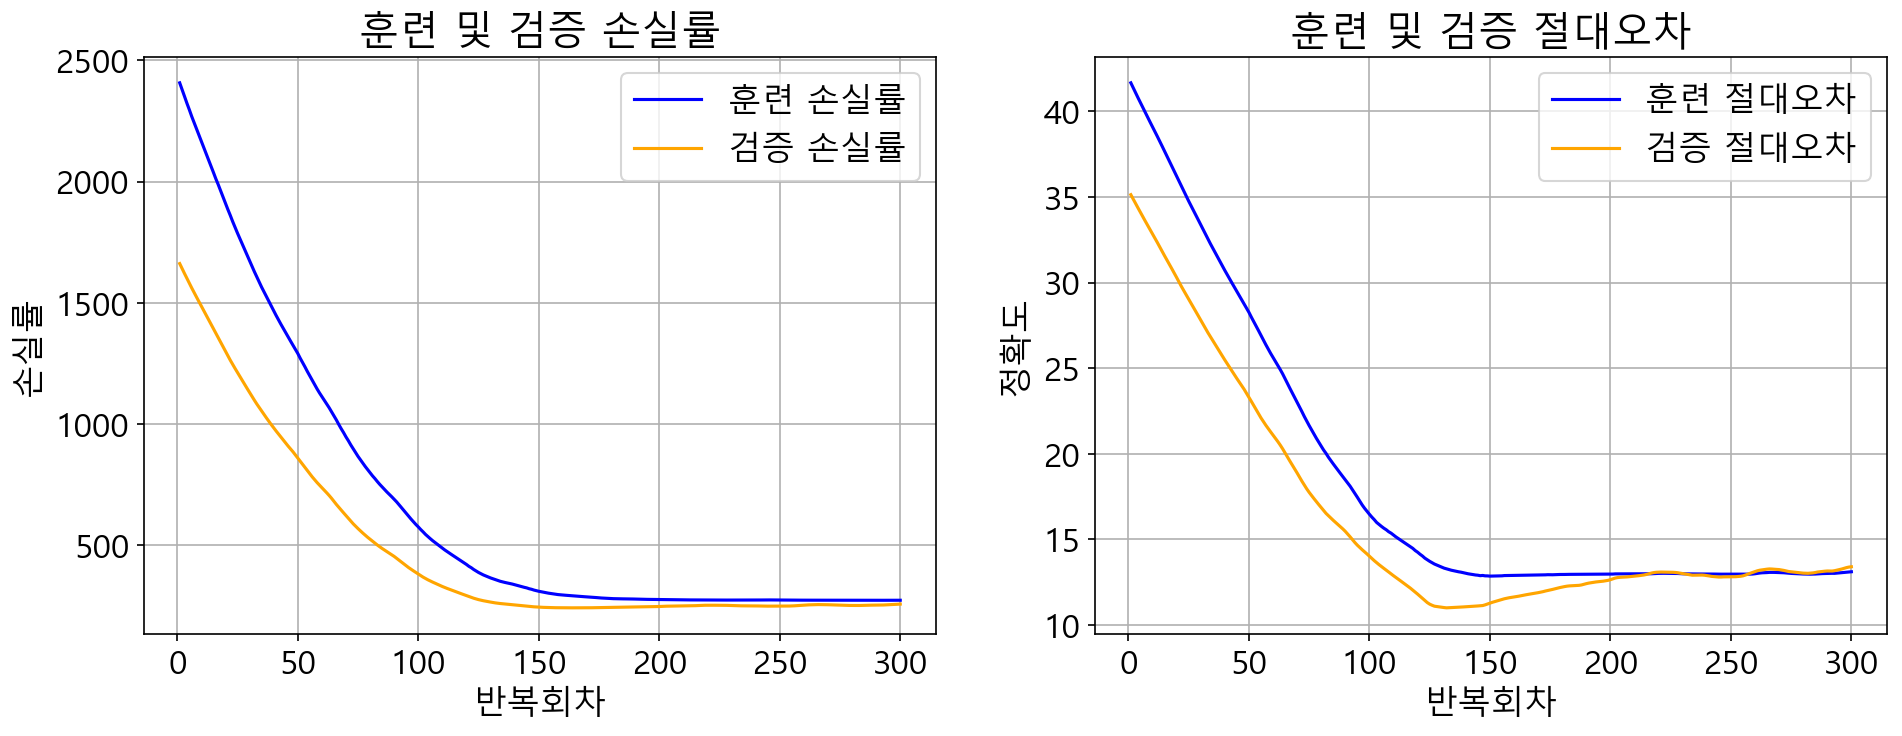

In [44]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

### 2. 모델 성능 평가

In [45]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 5ms/step - loss: 271.5468 - mae: 13.1092
최종 훈련 손실률: 271.546783, 최종 훈련 절대오차: 13.109236
1/1 [==============================] - 0s 26ms/step - loss: 255.5904 - mae: 13.3956
최종 검증 손실률: 255.590424, 최종 검증 절대오차: 13.395595


## #08. 학습 결과 적용

`통계`는 `데이터의 경향을 설명`, `머신러닝`은 `미래의 값을 예측`하는 것이 목적

### 1. 테스트 데이터에 대한 예측 결과 산정

In [46]:
results = model.predict(x_test)
print(results)

1/1 [==============================] - 0s 58ms/step
[[68.40706 ]
 [39.315006]
 [36.4058  ]
 [33.496597]
 [56.770237]
 [42.22421 ]
 [42.22421 ]
 [53.86103 ]
 [36.4058  ]
 [56.770237]
 [42.22421 ]
 [59.67944 ]
 [21.859777]
 [39.315006]
 [13.132158]]


### 2. 결과 데이터 셋 구성

In [47]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [48]:
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test,   #y_test를 Series 형태
    '예측값' : results.flatten()
})

kdf['예측오차'] = kdf['실제값']-kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
44,23,54,68.407059,-14.407059
17,13,34,39.315006,-5.315006
11,12,14,36.405800,-22.405800
9,11,17,33.496597,-16.496597
36,19,46,56.770237,-10.770237
21,14,60,42.224209,17.775791
22,14,80,42.224209,37.775791
31,18,42,53.861031,-11.861031
12,12,20,36.405800,-16.405800
37,19,68,56.770237,11.229763


### 3. 실제 결과값과 머신러닝에 의한 예측값 비교

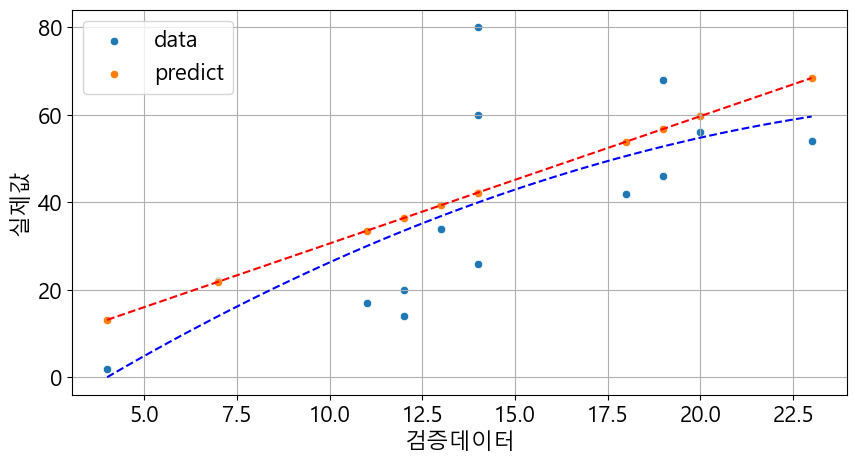

In [49]:
# 붉은색 - 예측 값, 푸른색 - 실제 값
helper.regplot(x_left=kdf['검증데이터'], y_left=kdf['실제값'], y_left_pred=kdf['예측값'])

### 3. 임의의 값에 대한 머신러닝 예측 결과

`통계`는 `데이터의 경향을 설명`, `머신러닝`은 `미래의 값을 예측`하는 것이 목적

In [50]:
my_speed = 50   #속력이 50인 경우의 제동거리
results = model.predict([[my_speed]])
print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, results))

1/1 [==============================] - 0s 88ms/step
속도가 50인 자동차의 제동거리는 146로 예상됩니다.
